In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import warnings
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras import layers
warnings.filterwarnings(action='ignore')

2024-09-18 22:06:53.529514: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-18 22:06:53.539452: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-18 22:06:53.552694: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-18 22:06:53.552723: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-18 22:06:53.562137: I tensorflow/core/platform/cpu_feature_gua

In [2]:
df_human = pd.read_csv('human_results.csv')
df_ai = pd.read_csv('ai_results.csv')

In [3]:
df_human['Label'] = 1  
df_ai['Label'] = 0 

In [4]:
df_combined = pd.concat([df_human, df_ai], ignore_index=True)

In [5]:
X = df_combined[['Precision', 'Recall', 'F1 Score', 'Edit Distance']]
y = df_combined['Label']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  
])

2024-09-18 22:06:55.481097: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2024-09-18 22:06:55.481118: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:134] retrieving CUDA diagnostic information for host: I153520
2024-09-18 22:06:55.481122: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:141] hostname: I153520
2024-09-18 22:06:55.481271: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:165] libcuda reported version is: 535.183.1
2024-09-18 22:06:55.481281: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:169] kernel reported version is: 535.183.1
2024-09-18 22:06:55.481283: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:248] kernel version seems to match DSO: 535.183.1


In [9]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=2e-5), loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4393 - loss: 0.6903 - val_accuracy: 0.4350 - val_loss: 0.6724
Epoch 2/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5775 - loss: 0.6620 - val_accuracy: 0.7029 - val_loss: 0.6491
Epoch 3/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6974 - loss: 0.6447 - val_accuracy: 0.7215 - val_loss: 0.6285
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7078 - loss: 0.6261 - val_accuracy: 0.7188 - val_loss: 0.6107
Epoch 5/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7085 - loss: 0.6103 - val_accuracy: 0.7188 - val_loss: 0.5951
Epoch 6/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7256 - loss: 0.5899 - val_accuracy: 0.7215 - val_loss: 0.5810
Epoch 7/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7067 - loss: 0.5838 - val_accuracy: 0.7241 - val_loss: 0.5685
Epoch 8/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7254 - loss: 0.5723 - val_accuracy: 0.7241 - v

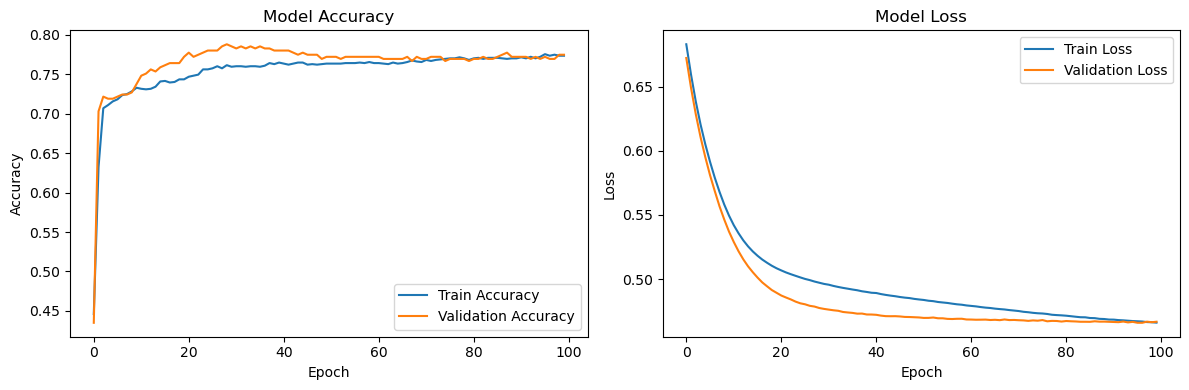

In [11]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [12]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - accuracy: 0.7671 - loss: 0.4629
Test Accuracy: 0.7558386325836182


In [13]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       261
           1       0.75      0.68      0.71       210

    accuracy                           0.76       471
   macro avg       0.75      0.75      0.75       471
weighted avg       0.76      0.76      0.75       471

